# introduction to regression with neural networks in tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


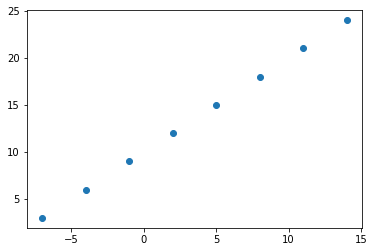

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

y = np.array([3., 6., 9.,12.,15.,18.,21.,24])

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim


0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
            #   optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 13.3031 - mae: 13.3031
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6561 - mae: 11.6561
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2751 - mae: 10.2751
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 8.8846 - mae: 8.8846
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2011 - mae: 7.2011
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 5.0756 - mae: 5.0756
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 4.1411 - mae: 4.1411
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 5.3391 - mae: 5.3391
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.0115 - mae: 6.0115
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 5.9827 - mae: 5.9827
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 5.509

In [ ]:
y_pred = model.predict([20.])
y_pred

1/1 [==============================] - 0s 82ms/step


array([[30.080786]], dtype=float32)

In [ ]:
y_pred + 11

array([[41.080788]], dtype=float32)

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

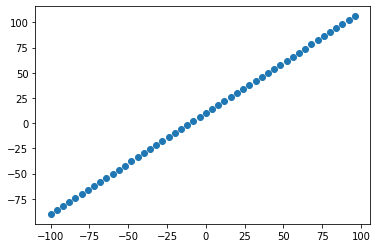

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [ ]:
X_train = X[:40] 
y_train = y[:40]

X_test = X[40:] 
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test) 

(40, 10, 40, 10)

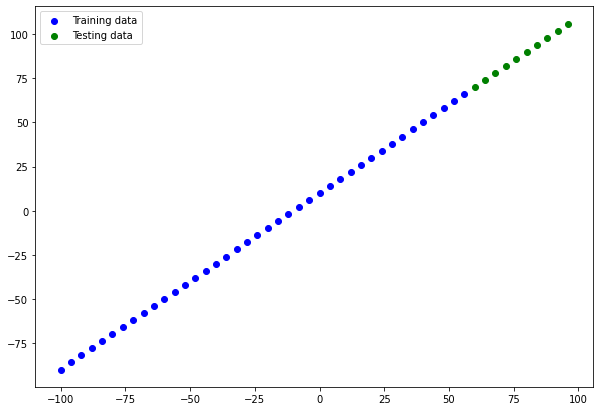

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [ ]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
            #   optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend()

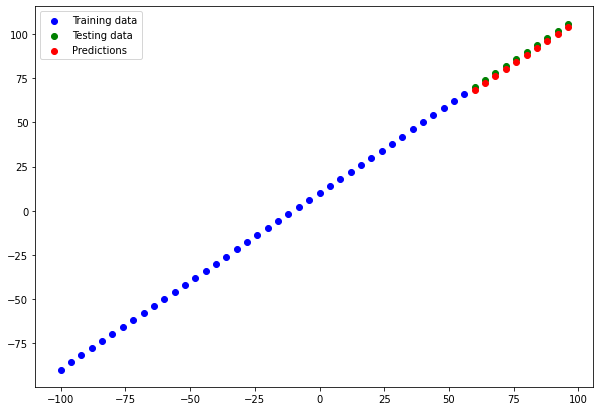

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 289ms/step - loss: 1.7708 - mae: 1.7708


[1.7708289623260498, 1.7708289623260498]

In [ ]:
sum([abs(tf.cast(y_test[i], tf.float32) - y_pred[i][0]) for i in range(len(y_test))])/len(y_test)


<tf.Tensor: shape=(), dtype=float32, numpy=1.770829>

In [ ]:
def mae(y_true, y_pred):
    return tf.keras.losses.mean_absolute_error(y_true, y_pred.squeeze()).numpy()
def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true,y_pred.squeeze()).numpy()

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

1/1 [==============================] - 0s 82ms/step


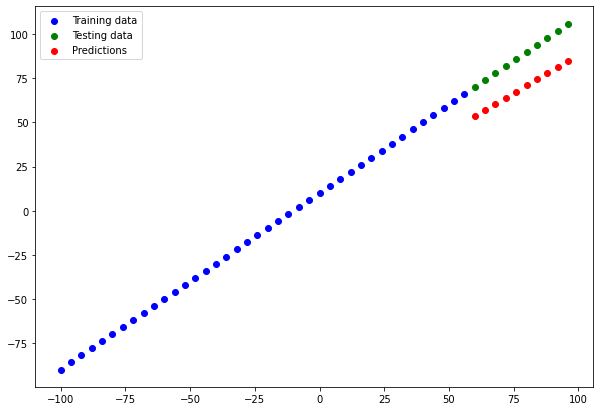

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(18.745327, 353.5734)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 41ms/step


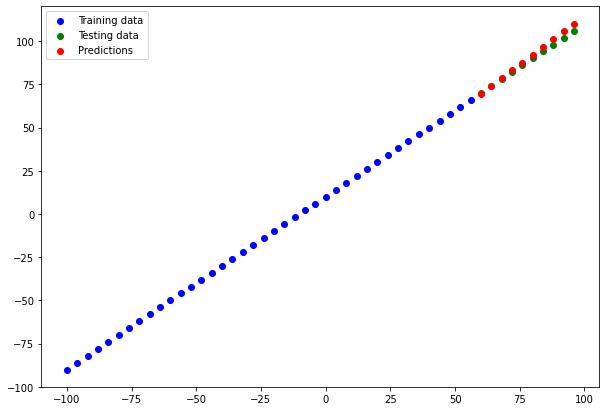

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(1.9098641, 5.4595404)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 42ms/step


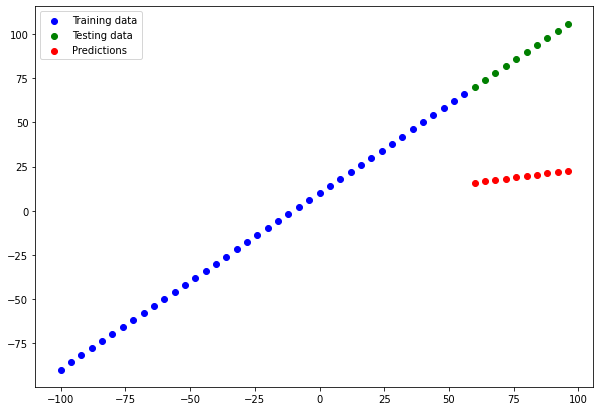

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(68.687874, 4804.4736)

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909864,5.459540
2,model_3,68.687874,4804.473633


In [ ]:
model_2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.save("best_model_SavedModel_format")

In [ ]:
model_2.save("best_model_HDF5_format.h5")

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_h5_format_preds = loaded_h5_format.predict(X_test)
model_2_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"], insurance["smoker"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [ ]:
tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.0840 - mae: 7578.0840
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7694.1348 - mae: 7694.1348
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.9121 - mae: 7595.9121
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7735.9106 - mae: 7735.9106

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2344 - mae: 8628.2344


[8628.234375, 8628.234375]

In [ ]:
tf.random.set_seed(42)


insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

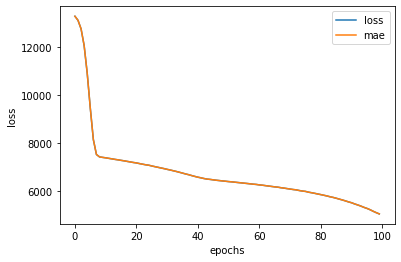

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3210.1187 - mae: 3210.1187


(3210.11865234375, 3210.11865234375)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import tensorflow as tf
from sklearn.model_selection import train_test_split


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])                                                     
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss='mae',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 5ms/step - loss: 3171.5781 - mae: 3171.5781
